<h1 align="center">Central Limit Theorm Tutorial</h1>

### What is the Central Limit Theorem (CLT)?
| **Term**                  | **Definition**                                                                                                                                                                                                             |
| ------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Central Limit Theorem** | A statistical theory stating that the **sampling distribution of the sample mean** approaches a **normal distribution**, regardless of the population's distribution, as the sample size becomes large (typically n ≥ 30). |


### Key Concepts of CLT

| **Component**               | **Explanation**                                                  |
| --------------------------- | ---------------------------------------------------------------- |
| **Population**              | The original dataset — can be skewed, uniform, etc.              |
| **Sample Mean**             | The average of values from a randomly drawn sample               |
| **Sampling Distribution**   | Distribution of sample means across many random samples          |
| **Shape of Sampling Dist.** | Approaches **normal distribution (bell curve)** as sample size ↑ |
| **Sample Size Rule**        | For CLT to apply effectively, **n ≥ 30** is typically sufficient |


### Real-World Applications of CLT
| **Application Area**      | **Use Case**                                                |
| ------------------------- | ----------------------------------------------------------- |
| **Quality Control**       | Estimating average defect rate in manufacturing             |
| **Finance**               | Estimating average return on investment                     |
| **Marketing A/B Testing** | Comparing average user behavior (clicks, conversions, etc.) |
| **Elections & Surveys**   | Inferring population opinion from random polling samples    |


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Say a solar company has surveyed 50 people each in total 207 cities in India to collect their average monthly electricity bill. This data is available in bill_survey file

In [2]:
df = pd.read_csv("bill_survey.csv")
df.head()

,City,Bill
0,Mumbai,15400
1,Mumbai,6700
2,Mumbai,16300
3,Mumbai,2100
4,Mumbai,4600


In [3]:
df.shape

(10350, 2)

In [4]:
# Print total number of cities
df.City.nunique()

207

Total 207 cities. Each city has 50 samples. Which means total rows in a data frame = 207*50 = 10350

Now plot  a distribution of all the samples. We can see from the below that it is a right skewed distribution

### Plot distribution for all the samples data for all cities

<Axes: xlabel='Bill', ylabel='Count'>

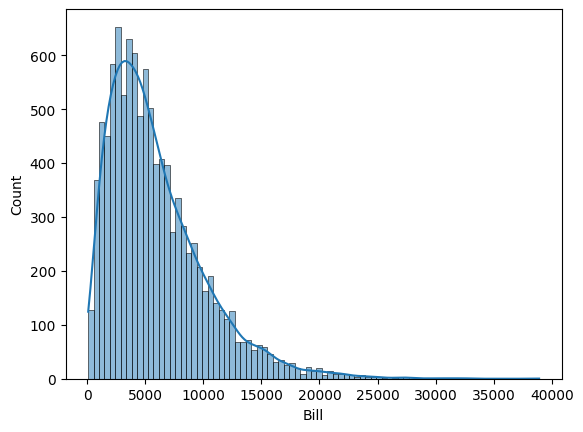

In [5]:
sns.histplot(df.Bill, kde=True)

### Plot sample distribution for few individual cities

<Axes: xlabel='Bill', ylabel='Count'>

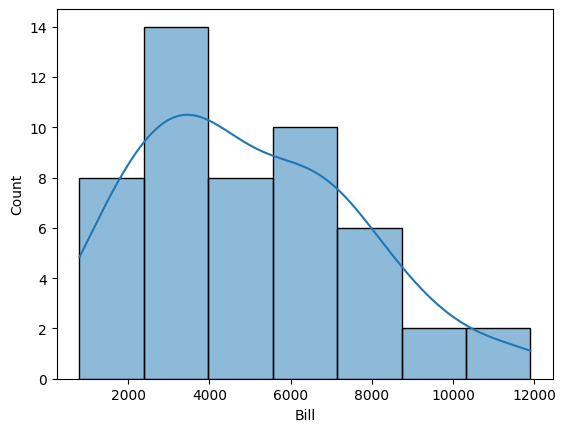

In [6]:
sns.histplot(df[df.City=="Kolkata"].Bill, kde=True)

<Axes: xlabel='Bill', ylabel='Count'>

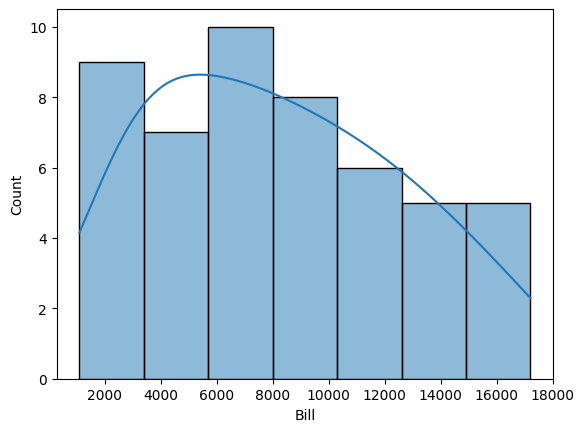

In [7]:
sns.histplot(df[df.City=="Surat"].Bill, kde=True)

### Plot a sampling distribution of means now

In [8]:
g = df.groupby("City")

sample_means = []

for city, subdf in g:
    sample_means.append(subdf.Bill.mean())
    
sample_means[:5]

[np.float64(6276.0),
 np.float64(6084.0),
 np.float64(5990.0),
 np.float64(5588.0),
 np.float64(5680.0)]

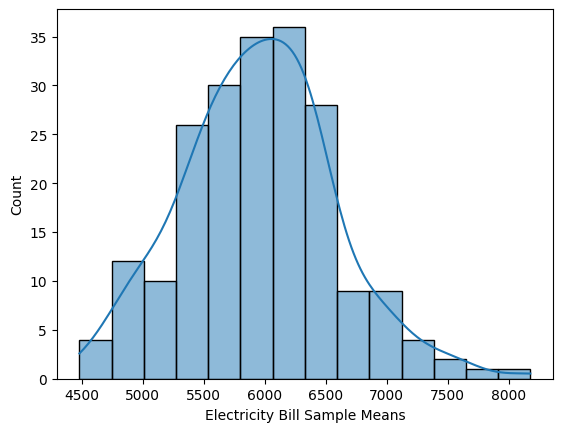

In [9]:
sns.histplot(sample_means, kde=True)

plt.xlabel("Electricity Bill Sample Means")
plt.show()

You can see that even though original distribution is right skewed, the sampling distribution is normal

### Generate a different type of distribution (not right skewed)

In [10]:
import numpy as np

sample_size = 1000
total_samples = 2000

def get_random_sample(sample_size):
    # generate two normal distributions with means that are far apart and merge them
    mean_1, std_dev_1 = np.random.randint(100,300),  np.random.randint(20, 80)
    mean_2, std_dev_2 = np.random.randint(700,900), np.random.randint(80, 200)
    left = np.random.normal(mean_1, std_dev_1, size=(int(sample_size/2),))
    right = np.random.normal(mean_2, std_dev_2, size=(sample_size-left.shape[0],))
    data = np.append(left, right)
    return data
    
for i in range(total_samples):
    if i==0: 
        data = get_random_sample(sample_size)
    else:
        new_sample = get_random_sample(sample_size)
        data = np.vstack((data, new_sample))

data.shape

(2000, 1000)

<Axes: ylabel='Count'>

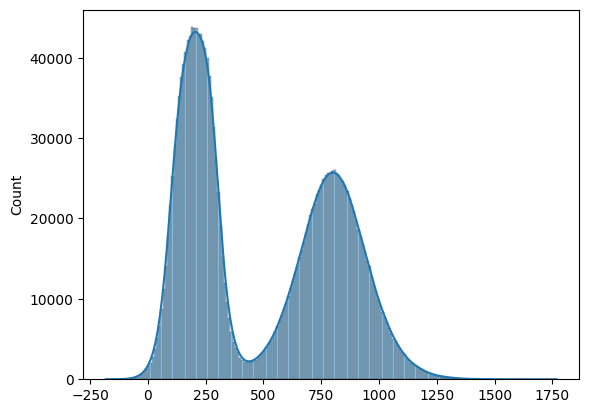

In [11]:
sns.histplot(data.flatten(), kde=True)

It looks like a random distribution as if two normal distributions are merged together. Now plot individual sample distributions

<Axes: ylabel='Count'>

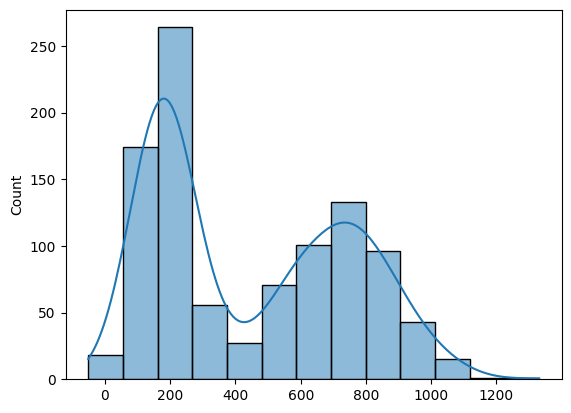

In [12]:
sns.histplot(data[0], kde=True)

<Axes: ylabel='Count'>

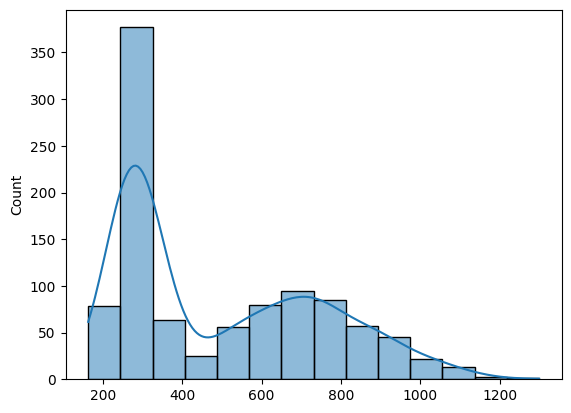

In [13]:
sns.histplot(data[1], kde=True)

### Plot sampling distribution of means now

<Axes: ylabel='Count'>

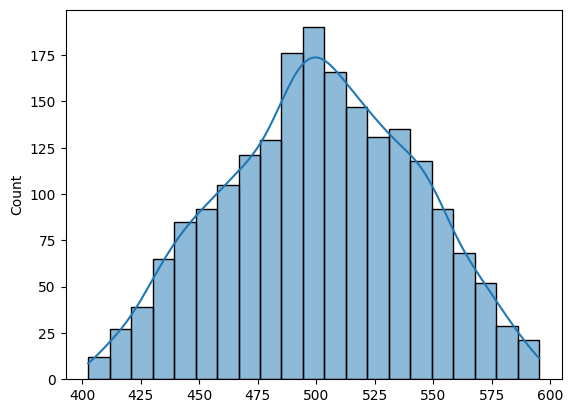

In [14]:
sample_means = []

for sample in data:
    sample_means.append(sample.mean())
    
sns.histplot(sample_means, kde=True)

Once again, even though the original distribution was not normal, the sampling distribution is normal. This is the basic premise of Central Limit Theorem (CLT)